Lab 9: Clustering
---------
What happens if we have data that we know should be classified between two classes, however we don't have the labels themselves. Is it possible to create an algorithm that can classify this data without the use of labels? Yes!

Today we are going to over some clustering algorithms. This is a form of unsupervised learning and is very important in the machine learning community.

The first algorithm we will go over and the most widely used is k-means clustering. This is a centroid-based clustering algorithm as is as follows:



### K-Means with Lloyd's Algorithm

The K-Means Algorithm is the most popular and widely used algorithm for automatically grouping data into coherent subsets.

1. Randomly initialize $K$ points in the dataset called the cluster centroids.

2. Cluster assignment: assign all examples into one of $K$ groups based on which cluster centroid the example is closest to.

3. Move centroid: compute the averages for all the points inside each of the $K$ cluster centroid groups, then move the cluster centroid points to those averages.

4. Re-run (2) and (3) until we have found our clusters.

Our main variables are:

- K (number of clusters)
- Training set ${x^{(1)}, x^{(2)}, \dots,x^{(m)}},$ where $x^{(i)} \in \mathbb{R}^n$

The Llyod's Algorithm for k-Means Clusering:

1. Initialize $K$ cluster centroids mu(1), mu(2), ..., mu(K)
2. Repeat:
   1. for i = 1 to m:
      - c(i):= index (from 1 to K) of cluster centroid closest to x(i)
   2. for k = 1 to K:
      - mu(k):= average (mean) of points assigned to cluster k
      
   until the centroids is unchanged

In [1]:
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
def init_board(N):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X

def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1, 1), random.uniform(-1, 1))
        s = random.uniform(0.05,0.1)
        x = []
        while len(x) < n:
            a, b = np.array([np.random.normal(c[0], s), np.random.normal(c[1], s)])
            # Continue drawing points from the distribution in the range [-1,1]
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X

def plot_board(X, K, mu, clus, N):
    fig = plt.figure(figsize=(5,5))
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    if clus:
        for m, clu in clus.items():
            cs = cm.get_cmap("Spectral")(1.*m/K)
            plt.plot(mu[m][0], mu[m][1], 'o', marker='*', \
                     markersize=12, color=cs)
            plt.plot(list(zip(*clus[m]))[0], list(zip(*clus[m]))[1], '.', \
                     markersize=8, color=cs, alpha=0.5)
    else:
        plt.plot(X[:,0], X[:,1], '.', alpha=0.5)
    tit = 'K-means with random initialization'
    pars = 'N=%s, K=%s' % (str(N), str(K))
    plt.title('\n'.join([pars, tit]), fontsize=16)
    plt.show()


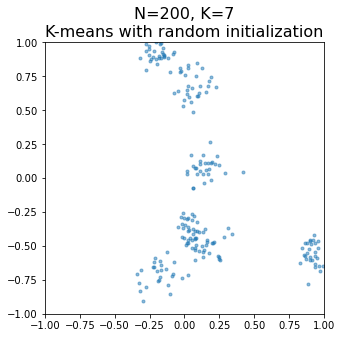

In [3]:
K = 7
N = 200
X = init_board_gauss(N, K)
mu, clusters = None, None
plot_board(X, K, mu, clusters, N)

In [4]:
def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        # Find bestmukey as an exercise. Hint: Use np.argmin and np.linalg.norm
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters
 
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        pass
        # Complete as an exercise
    return newmu
 
def has_converged(mu, oldmu):
    #Complete as an exercise
    return

 
def find_centers(X, K):
    # Initialize to K random centers
    oldmu = X[np.random.choice(X.shape[0], K, replace=False)]
    mu = X[np.random.choice(X.shape[0], K, replace=False)]
    while not has_converged(mu, oldmu):
        # Complete as an exercise
        # Hint, make use of functions previously defined
    return mu, clusters

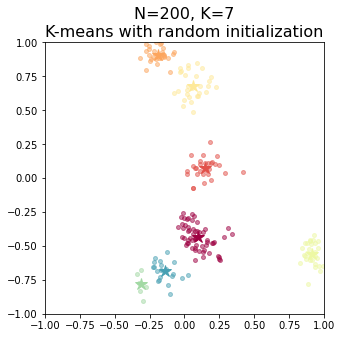

In [5]:
mu, clusters = find_centers(X, K)
plot_board(X, K, mu, clusters, N)

In [6]:
def find_centers_with_plot(X, K):
    # Initialize to K random centers
    N = X.shape[0]
    oldmu = X[np.random.choice(X.shape[0], K, replace=False)]
    mu = X[np.random.choice(X.shape[0], K, replace=False)]
    while not has_converged(mu, oldmu):
        # Use same code from previous exercise, but add the plotting between the steps.
        plot_board(X, K, mu, clusters, N)
    return mu, clusters

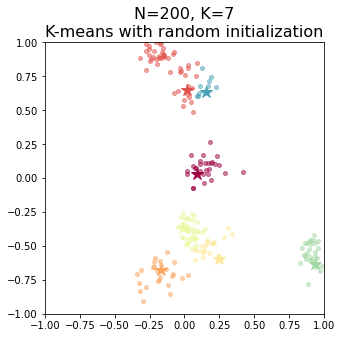

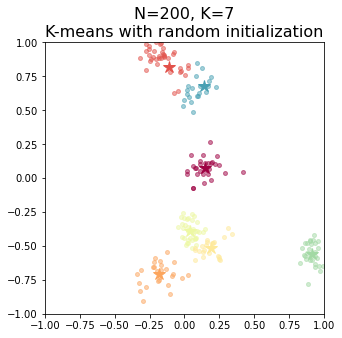

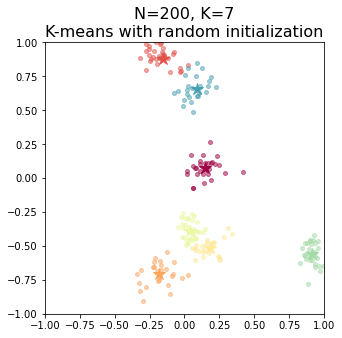

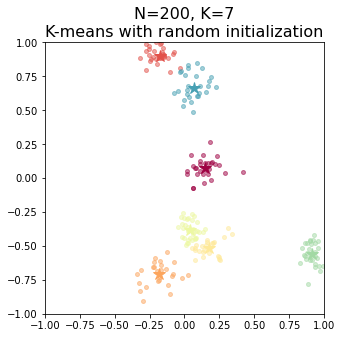

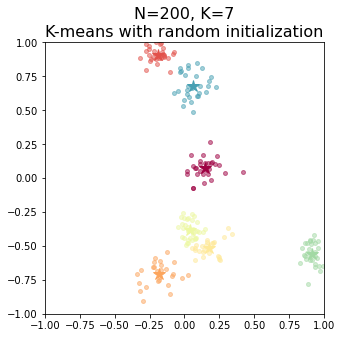

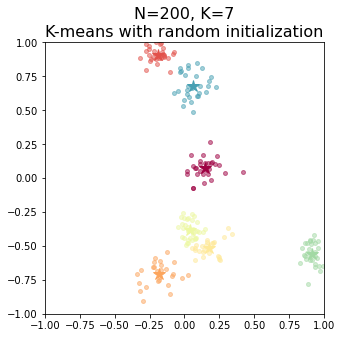

In [7]:
mu, clusters = find_centers_with_plot(X, K)

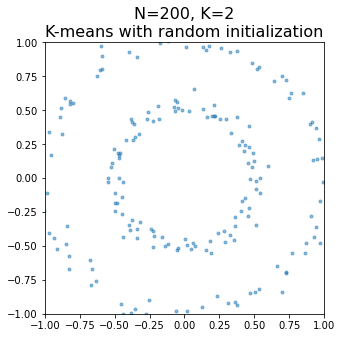

In [13]:
from sklearn import datasets

K=2

noisy_circles = datasets.make_circles(n_samples=N, factor=.5,  noise=.05)

X = noisy_circles[0]
mu, clusters = None, None
plot_board(X, K, mu, clusters, N)

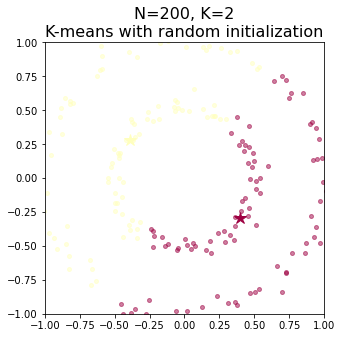

In [14]:
mu, clusters = find_centers(X, K)
plot_board(X, K, mu, clusters, N)

### Spectral Clustering

Spectral Clustering is a form of clustering applied to graphs in graph theory. One benefit of spectral clustering is that it can work on non-flat geometry, however it can be very computationally expensive with large amount of clusters and samples.

To start, we need to convert our data into a graph, as spectral clustering is applied to graphs. The way that we are going to do this is by using the k-nearest neighbours (This is different than k-means). Essentially, every data point will be defined a node in our graph. Then, an edge will be drawn from each node to its k closest neighbours. The sklearn will give us an adjacancy matrix, and we want to convert that to the Laplacian matrix of our graph. The Laplacian is a representation of the graph and has many useful properties (not only for clustering). 

The eigenvalues of this Laplacian are what is important to us. Basically, the eigenvalues of the Laplacian essentially tell us how connected the graph is with the number of eigenvalues that are equal to zero being the number of disjoint connected subgraphs. Looking at the eigenvalues, where there is the biggest jump can give us some insight to how many clusters are natural to the graph. In the case where we already know how many there should be, we do not have to do this part of the analysis.

The eigenvectors corresponding to the smallest n eigenvalues (except for the smallest which will be 0), can then be clustered using k-means to find the final clusters.

In the binary case, we can use a trick where we don't have to use k-means, and just have to check if the corresponding value in the eigenvector is positive. (Since there are only two classes, there is only one eigenvector).

Overall, this method maps the data to a graph (increasing its dimensionality), then reduces it by only choosing the relevant eigenvectors, and then applies k-means. This is similar to the kernel trick for SVMs. Thus, this can be seen as a very general form of kernel k-means.

<ipython-input-18-fc3d56a57bd2>:18: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  colours = [colours[cluster] for cluster in clusters]


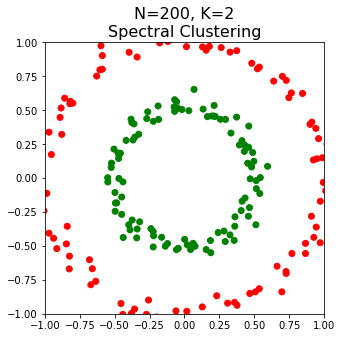

In [18]:
from sklearn.neighbors import kneighbors_graph
import jax.numpy as jnp
import jax

A = kneighbors_graph(X, n_neighbors=5).toarray()
D = jnp.diag(A.sum(axis=1))
L = D-A

vals, vecs = jnp.linalg.eig(L)
vecs = vecs[:,jnp.argsort(vals)]
vals = vals[jnp.argsort(vals)]

clusters = jax.nn.normalize(vecs[:,1]) > 0
fig = plt.figure(figsize=(5,5))
plt.xlim(-1,1)
plt.ylim(-1,1)
colours = ["r", "g"]
colours = [colours[cluster] for cluster in clusters]

plt.scatter(list(zip(*X))[0], list(zip(*X))[1], c=colours)
tit = 'Spectral Clustering'
pars = 'N=%s, K=%s' % (str(N), str(K))
plt.title('\n'.join([pars, tit]), fontsize=16)
plt.show()